# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_duplicates["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# ReChecking the number of mice in the clean DataFrame.
mice_numbers = clean_total_data["Mouse ID"].nunique()
print(f"There are a total of {mice_numbers} total unique mice")

There are a total of 249 total unique mice


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_data = clean_total_data.groupby("Drug Regimen")
drug_mean = grouped_data["Tumor Volume (mm3)"].mean()
drug_median = grouped_data["Tumor Volume (mm3)"].median()
drug_var = grouped_data["Tumor Volume (mm3)"].var()
drug_std = grouped_data["Tumor Volume (mm3)"].std()
drug_sem = grouped_data["Tumor Volume (mm3)"].sem()

# New Data Frame
drug_summary  = pd.DataFrame({"Mean Tumor Volume":  drug_mean,
                                 "Median Tumor Volume":  drug_median,
                                 "Tumor Volume Variance":  drug_var,
                                 "Tumor Volume Std. Dev.":  drug_std,
                                 "Tumor Volume Std. Err.":  drug_sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summ = clean_total_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_summ.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

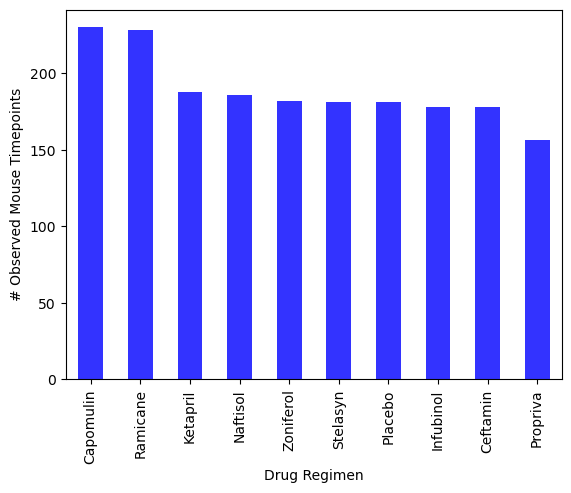

In [8]:
# Pandas bar plot
mice_drug_group = clean_total_data[["Drug Regimen","Timepoint"]]

#find count per drug
mice_per_drug = mice_drug_group["Drug Regimen"].value_counts()
# mice_per_drug

# Graph Build
mice_per_drug.plot(kind="bar",color = "blue", alpha = 0.80,
                  xlabel="Drug Regimen",
                  ylabel="# Observed Mouse Timepoints")

plt.show()

In [9]:
mice_per_drug.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

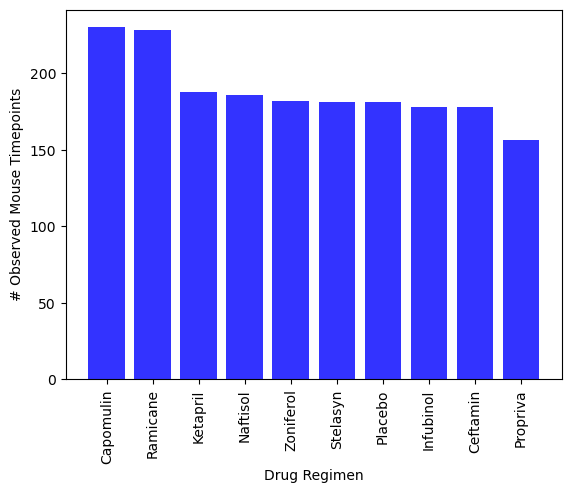

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index
timepoints = mice_per_drug

# Graph Build
plt.bar(drugs, timepoints, facecolor="blue",alpha=0.80)
plt.xlabel('Drug Regimen')
plt.ylabel("# Observed Mouse Timepoints")
plt.xticks(rotation = 90)

plt.show()

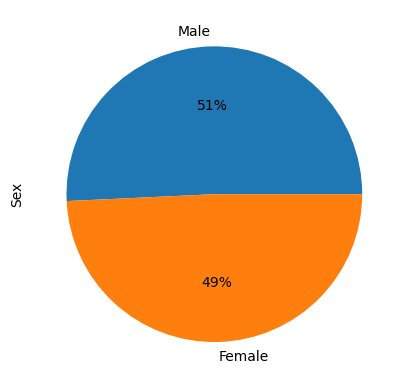

In [11]:
# Pandas plot
male_female = clean_total_data["Sex"].value_counts()
genders = ["Male", "Female"]

# Graph Build
male_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")


plt.show()

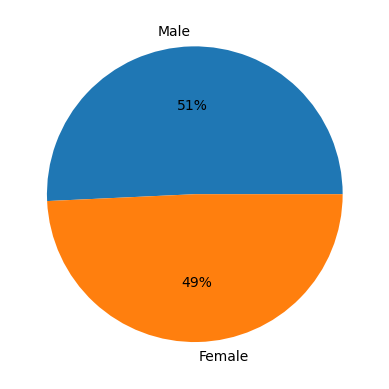

In [12]:
# PyPlot pie
gender = clean_total_data['Sex'].value_counts()

# Graph Build
plt.pie(gender, labels=gender.index, autopct='%1.0f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") | (clean_total_data["Drug Regimen"] == "Ramicane") |
                                        (clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]
reduced_drug_data

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
greatest_tp

# Clean time points
reduced_tp = greatest_tp.reset_index()[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_df = reduced_tp.loc[reduced_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_tp.loc[reduced_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_tp.loc[reduced_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_tp.loc[reduced_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty dictionaries to store upper and lower bounds for each drug
lower_bounds = {}
upper_bounds = {}

# Calculate the IQR and determine any potential outliers
for drug in treatment:    
    quartiles = new_df[drug].quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    drug_iqr = upperq - lowerq
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = lowerq - (1.5 * drug_iqr)
    upper_bound = upperq + (1.5 * drug_iqr)
    
    # Store the lower and upper bounds in the dictionaries
    lower_bounds[drug] = lower_bound
    upper_bounds[drug] = upper_bound

# Print the lower and upper bounds for each drug
for drug in treatment:
    print(f"For {drug}: Tumor volume lower than {lower_bounds[drug]} is a potential outlier")
    print(f"For {drug}: Tumor volume higher than {upper_bounds[drug]} is a potential outlier")


For Capomulin: Tumor volume lower than 20.70456164999999 is a potential outlier
For Capomulin: Tumor volume higher than 51.83201549 is a potential outlier
For Ceftamin: Tumor volume lower than 25.355449580000002 is a potential outlier
For Ceftamin: Tumor volume higher than 87.66645829999999 is a potential outlier
For Infubinol: Tumor volume lower than 36.83290494999999 is a potential outlier
For Infubinol: Tumor volume higher than 82.74144559000001 is a potential outlier
For Ramicane: Tumor volume lower than 17.912664470000003 is a potential outlier
For Ramicane: Tumor volume higher than 54.30681135 is a potential outlier


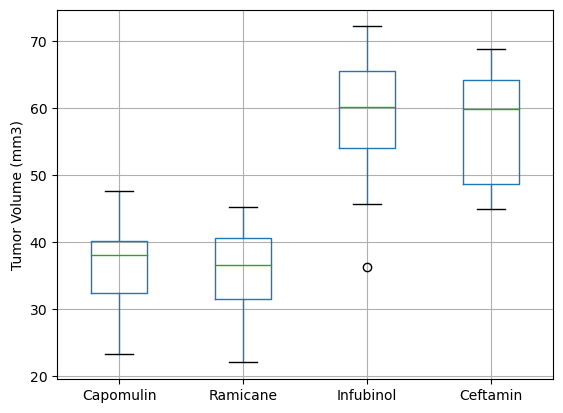

In [15]:
# Create a boxplot from the 'new_df' DataFrame
boxplot = new_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

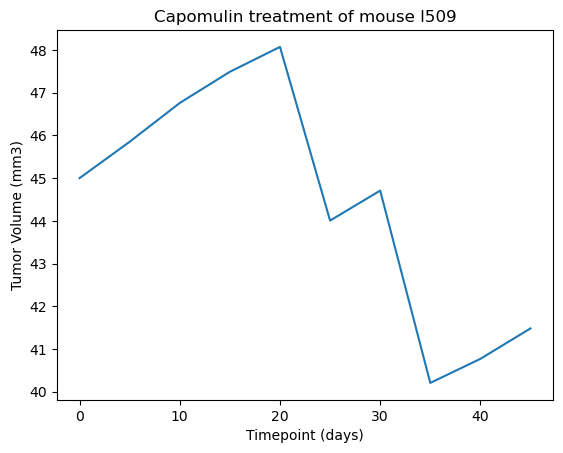

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#create dataframe with just Capolumin data
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
new_df2 = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
new_capomulin = new_df2.set_index(["Timepoint"])

#get values ready for plotting
timepoint = new_capomulin.index
tumor_vol = new_capomulin

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



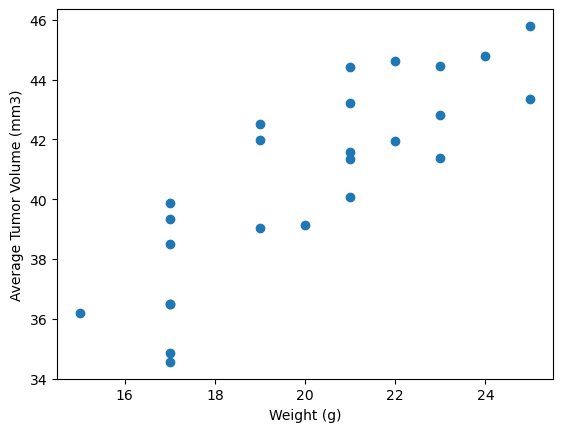

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
new_capomulin_df2 = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor = new_capomulin_df2[("Tumor Volume (mm3)")].mean()
avg_weight = new_capomulin_df2["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": avg_weight,
                            "Tumor Volume (mm3)": avg_tumor})
#graph build and display
plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


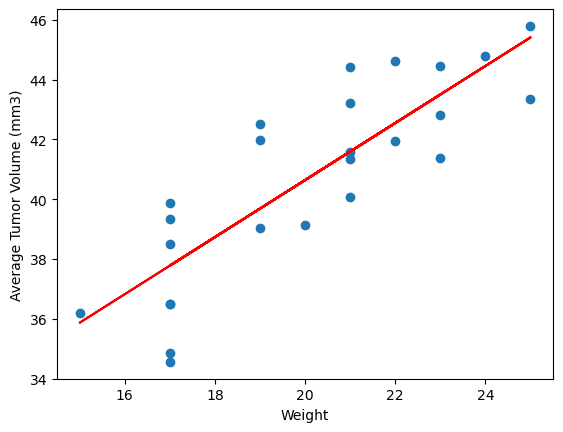

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr (avg_weight,avg_tumor )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()